In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os
import sys
import pickle
from struct import *
import pandas as pd
import seaborn as sns
import mixture
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")
import collections
from math import pi, cos, sin, cosh, tanh
from scipy.spatial.transform import Rotation as Rot
import cv2
import plotting
from plotting import *
import interpolation
from interpolation import *
import ficks
from ficks import *
import structure
from structure import *
import scipy.interpolate
import scipy.integrate
import scipy.stats
from sklearn.linear_model import RANSACRegressor, TheilSenRegressor, LinearRegression
from sklearn.mixture import GaussianMixture
from scipy.stats import norm, pearsonr
from scipy.signal import argrelextrema
from statistics import median

In [2]:
#
# Define colors and states for plotting events.
#
STATES = ['fix', 'sac', 'smp', 'vor', 'blink', 'fix_blink', 'sac_blink', 'other', 'loss']
COLORS = {'fix':'red', 'sac':'lime', 'smp':'purple', 'vor':'brown', 'blink':'dodgerblue', 'fix_blink':'darkorchid', 'sac_blink':'turquoise', 'other':'grey', 'loss':'gold'}
BORDERS = {'fix':'magenta', 'sac':'green', 'smp':'blue', 'vor':'tan', 'blink':'royalblue', 'fix_blink':'darkviolet', 'sac_blink':'lightseagreen', 'other':'black', 'loss':'yellow'}
BINS = 50

## Load data

In [3]:
seq = pd.read_csv('/data/Isabella/thesis_spring2022/event_detect_out_final/all_sequences_varjo.csv')

## Analysis

In [4]:
print('Saccades under 1 deg')
print(np.round(len(seq.loc[(seq.event=='sac')&(seq.amplitude<1)])/len(seq[seq.event=='sac'])*100,2),'%')

print('\nSmooth Pursuit under 1 deg')
print(np.round(len(seq.loc[(seq.event=='smp')&(seq.amplitude<1)])/len(seq[seq.event=='smp'])*100,2),'%')


Saccades under 1 deg
0.0 %

Smooth Pursuit under 1 deg
0.0 %


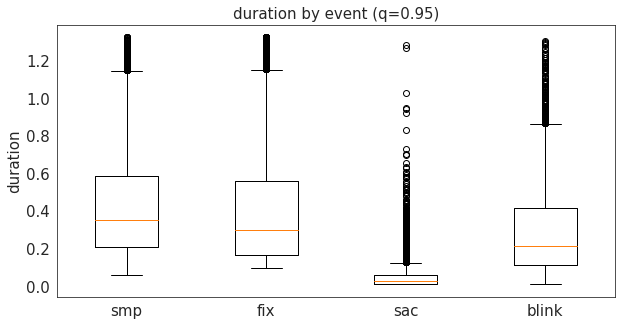

In [5]:
feature_boxplot_by_event(seq, 'duration', q=.95)

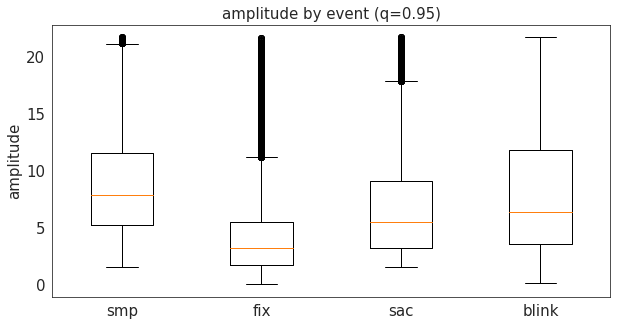

In [6]:
feature_boxplot_by_event(seq, 'amplitude', q=.95)

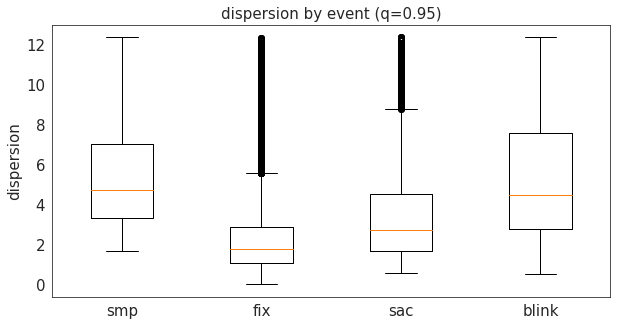

In [7]:
feature_boxplot_by_event(seq, 'dispersion', q=.95)

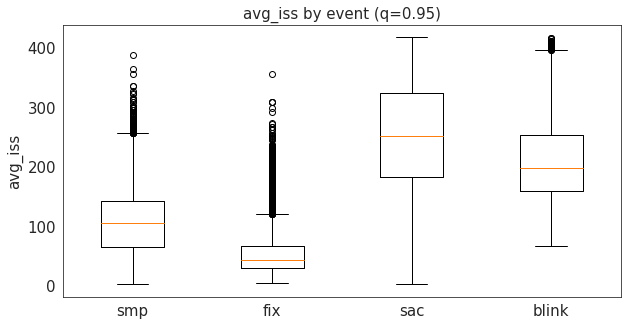

In [61]:
feature_boxplot_by_event(seq, 'avg_iss', q=.95)

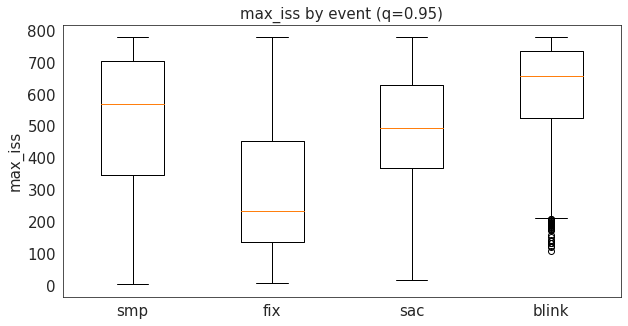

In [62]:
feature_boxplot_by_event(seq, 'max_iss', q=.95)

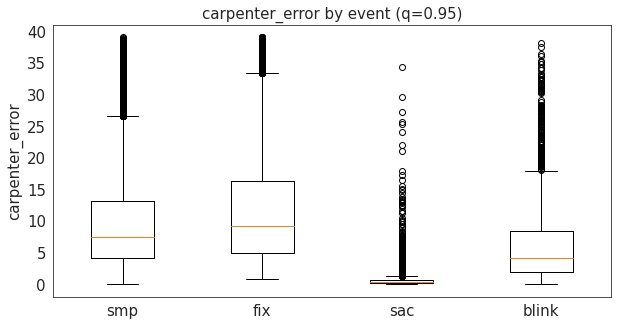

In [8]:
feature_boxplot_by_event(seq, 'carpenter_error', q=.95)

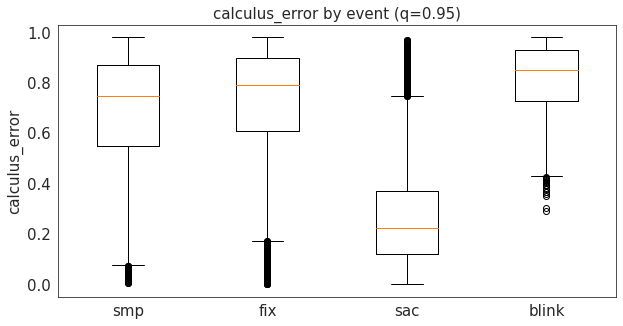

In [9]:
feature_boxplot_by_event(seq, 'calculus_error', q=.95)

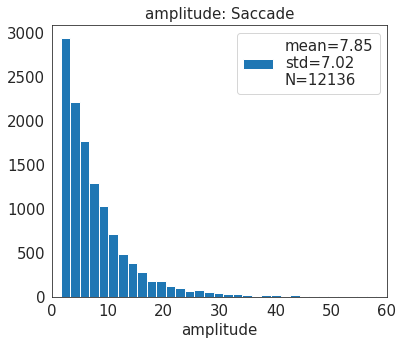

In [10]:
feature_histogram(seq, feat='amplitude', event='sac', q=1,x=60)

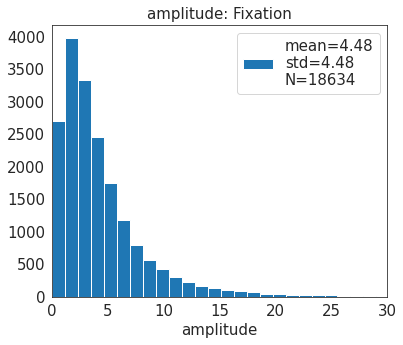

In [11]:
feature_histogram(seq, feat='amplitude', event='fix',q=1,x=30)

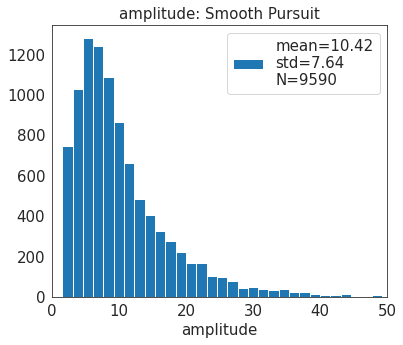

In [12]:
feature_histogram(seq, feat='amplitude', event='smp',q=1,x=50)

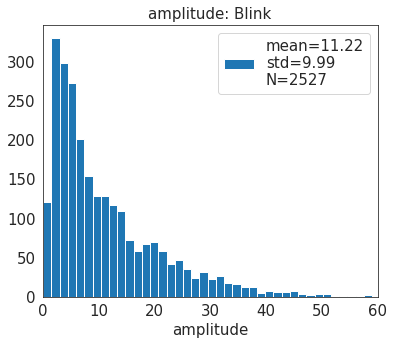

In [13]:
feature_histogram(seq, feat='amplitude', event='blink',q=1,x=60)

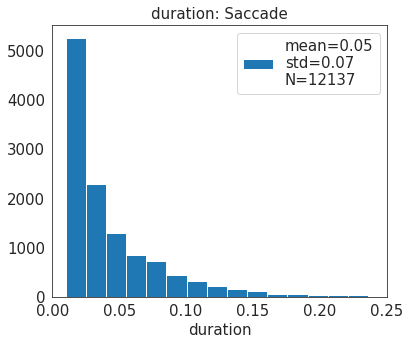

In [14]:
feature_histogram(seq, feat='duration', event='sac',q=1, x= .25)

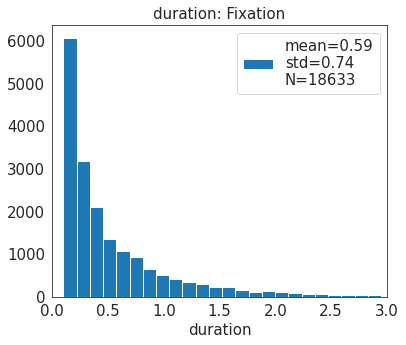

In [37]:
feature_histogram(seq, feat='duration', event='fix',q=1, x=3)

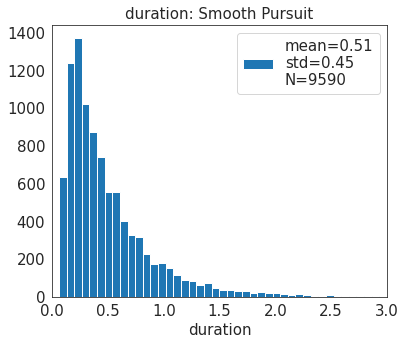

In [16]:
feature_histogram(seq, feat='duration', event='smp',q=1,x=3)

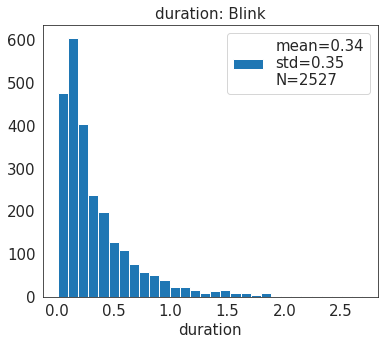

In [41]:
feature_histogram(seq, feat='duration', event='blink',q=1)

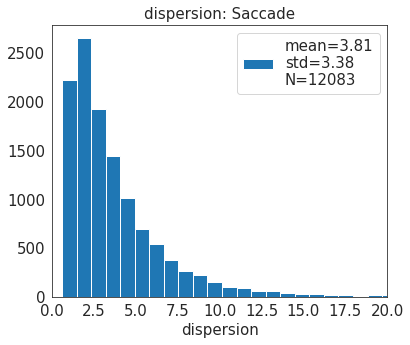

In [18]:
feature_histogram(seq, feat='dispersion', event='sac', q=1, x=20)

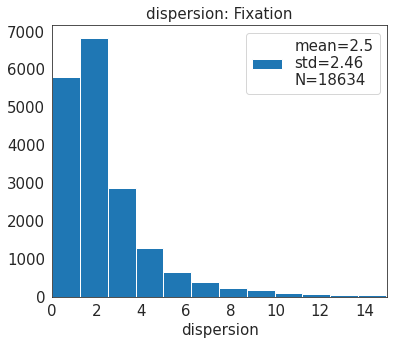

In [43]:
feature_histogram(seq, feat='dispersion', event='fix', q=1,x=15)

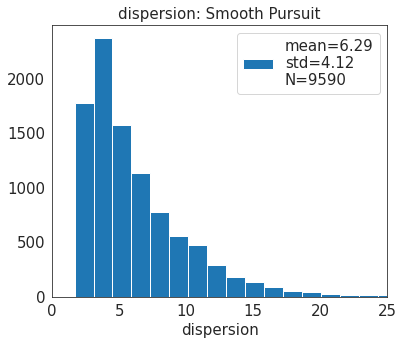

In [44]:
feature_histogram(seq, feat='dispersion', event='smp',q=1,x=25)

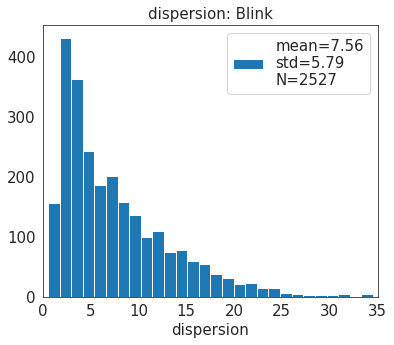

In [45]:
feature_histogram(seq, feat='dispersion', event='blink',q=1,x=35)

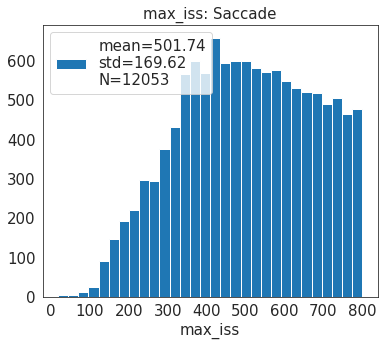

In [53]:
feature_histogram(seq, feat='max_iss', event='sac')

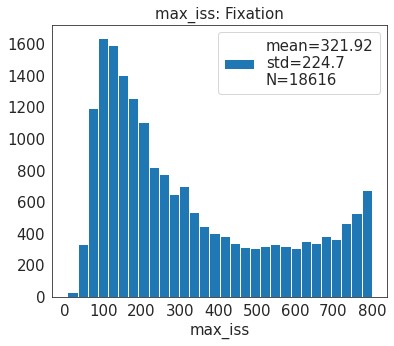

In [54]:
feature_histogram(seq, feat='max_iss', event='fix')

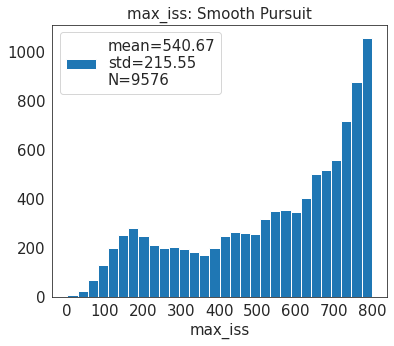

In [55]:
feature_histogram(seq, feat='max_iss', event='smp')

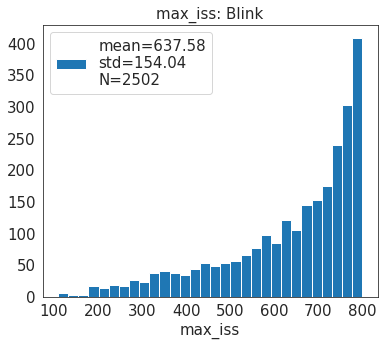

In [56]:
feature_histogram(seq, feat='max_iss', event='blink')

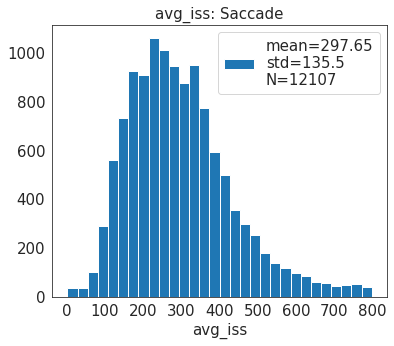

In [57]:
feature_histogram(seq, feat='avg_iss', event='sac', q=1)

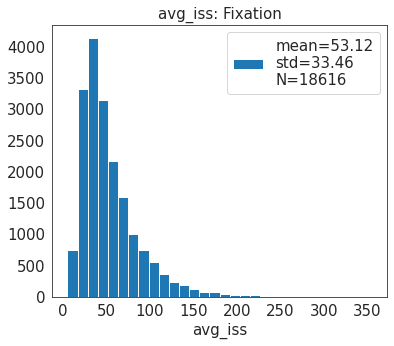

In [58]:
feature_histogram(seq, feat='avg_iss', event='fix', q=1)

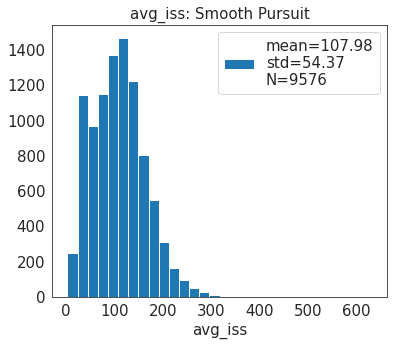

In [59]:
feature_histogram(seq, feat='avg_iss', event='smp',q=1)

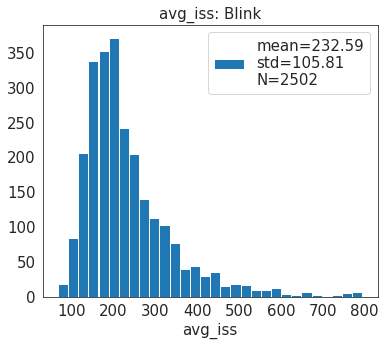

In [60]:
feature_histogram(seq, feat='avg_iss', event='blink',q=1)

In [30]:
seq.loc[:,'HMD':].head()

,HMD,rate,eye,task,subID,VL,event,start_i,end_i,start_s,...,calculus_error,carpenter_error,P_nonfix,P_fix,P_ff,P_smp,P_sac,P_blink,has_blink,UID
0,varjo,200,right,cereal,P19,CVL,smp,0,25,1.081565,...,0.366132,1.527210,0.534494,0.465506,5.470863e-11,0.465506,0.384207,0.150287,0,varjoP19cerealright
1,varjo,200,right,cereal,P19,CVL,fix,26,49,1.211610,...,0.230767,2.684010,0.059622,0.940378,8.531830e-01,0.087195,0.057516,0.002106,0,varjoP19cerealright
2,varjo,200,right,cereal,P19,CVL,sac,50,56,1.326648,...,0.732365,0.474248,0.728794,0.271206,2.022088e-01,0.068997,0.000396,0.728398,0,varjoP19cerealright
3,varjo,200,right,cereal,P19,CVL,noise,57,59,1.361658,...,NaN,NaN,0.667140,0.332860,3.218246e-01,0.011035,0.000000,0.000000,0,varjoP19cerealright
4,varjo,200,right,cereal,P19,CVL,fix,60,205,1.381670,...,0.913183,24.923594,NaN,NaN,NaN,NaN,NaN,NaN,0,varjoP19cerealright


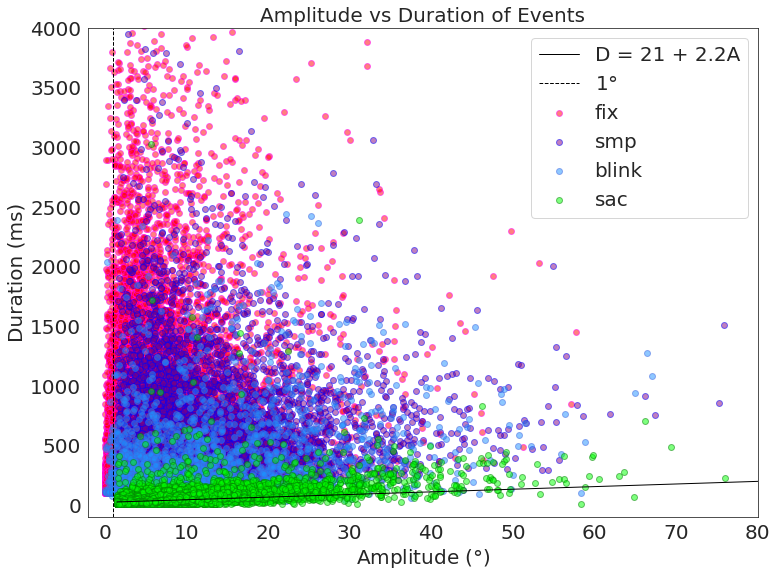

In [31]:
plot_carpenter(seq,show_events=['fix','smp','blink','sac'])

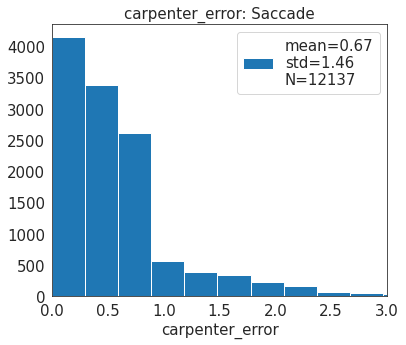

In [47]:
feature_histogram(seq, feat='carpenter_error', event='sac',q=1,x=3)

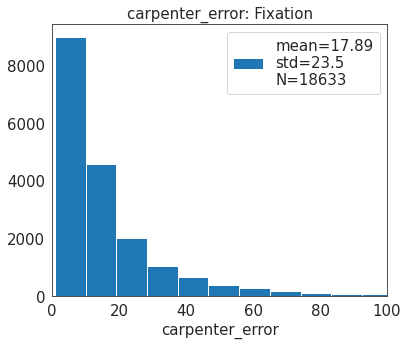

In [33]:
feature_histogram(seq, feat='carpenter_error', event='fix',q=1,x=100)

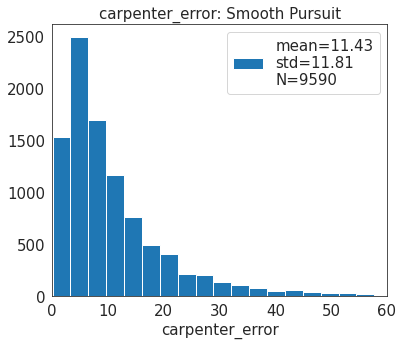

In [34]:
feature_histogram(seq, feat='carpenter_error', event='smp',x=60)

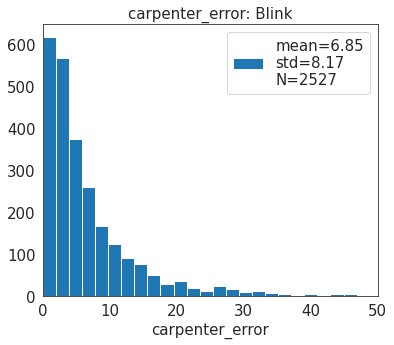

In [35]:
feature_histogram(seq, feat='carpenter_error', event='blink',x=50)

In [36]:
for e in ['sac', 'fix', 'smp', 'blink']:
    print(e)
    print(np.round(seq.loc[seq.event==e,['duration','amplitude','dispersion','avg_iss','max_iss','carpenter_error','calculus_error']].describe(),3))
    print('\n')

sac
        duration  amplitude  dispersion    avg_iss    max_iss  \
count  12137.000  12137.000   12083.000  12108.000  12054.000   
mean       0.051      7.861       3.814    297.688    501.762   
std        0.075      7.054       3.384    135.580    169.645   
min        0.010      1.502       0.583      2.898     17.986   
25%        0.015      3.284       1.694    199.106    372.647   
50%        0.030      5.748       2.803    278.945    502.970   
75%        0.060      9.849       4.732    369.955    642.114   
max        3.021     88.633      44.043    799.478    799.996   

       carpenter_error  calculus_error  
count        12137.000       12137.000  
mean             0.665           0.277  
std              1.461           0.215  
min              0.000           0.000  
25%              0.218           0.121  
50%              0.444           0.225  
75%              0.669           0.378  
max             88.856           1.474  


fix
        duration  amplitude  disper